Setup
====

In [22]:
import seaborn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
import clusterrewire as cr
from clusterrewire import cluster_rewire_graph
import networkx as nx

Create the initial graph
===

In [34]:
n_nodes = 100
p = 1.5*log(n_nodes)/n_nodes
g = nx.erdos_renyi_graph(n=n_nodes, p=p)

try_count = 1
max_tries = 1000
while not nx.is_connected(g):
    g = nx.erdos_renyi_graph(n=n_nodes, p=p)
    try_count += 1
    if try_count>max_tries:
        print("Can't make a connected graph. Tried %i times."%max_tries)
        break

original_graph = g.copy()

print("Average degree: %.2f"%mean(list(g.degree().values())))

Average degree: 10.46


Cluster up
====

In [7]:
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best)
find_best_clustering = array(triangles_completed)/array(triangles_possible)

Attempting 328 edge rewires, out of 328 edges
Rewiring 0 out of 328
Rewiring 10 out of 328
Rewiring 20 out of 328
Rewiring 30 out of 328
Rewiring 40 out of 328
Rewiring 50 out of 328
Rewiring 60 out of 328
Rewiring 70 out of 328
Rewiring 80 out of 328
Rewiring 90 out of 328
Rewiring 100 out of 328
Rewiring 110 out of 328
Rewiring 120 out of 328
Rewiring 130 out of 328
Rewiring 140 out of 328
Rewiring 150 out of 328
Rewiring 160 out of 328
Rewiring 170 out of 328
Rewiring 180 out of 328
Rewiring 190 out of 328
Rewiring 200 out of 328
Rewiring 210 out of 328
Rewiring 220 out of 328
Rewiring 230 out of 328
Rewiring 240 out of 328
Couldn't make a move!
Rewired 73.2 percent of edges


In [5]:
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
improve_worst_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_improve_worst)
improve_worst_clustering = array(triangles_completed)/array(triangles_possible)

Attempting 328 edge rewires, out of 328 edges
Rewiring 0 out of 328
Rewiring 10 out of 328
Rewiring 20 out of 328
Rewiring 30 out of 328
Rewiring 40 out of 328
Rewiring 50 out of 328
Rewiring 60 out of 328
Rewiring 70 out of 328
Rewiring 80 out of 328
Rewiring 90 out of 328
Rewiring 100 out of 328
Rewiring 110 out of 328
Rewiring 120 out of 328
Rewiring 130 out of 328
Rewiring 140 out of 328
Rewiring 150 out of 328
Rewiring 160 out of 328
Rewiring 170 out of 328
Rewiring 180 out of 328
Rewiring 190 out of 328
Rewiring 200 out of 328
Rewiring 210 out of 328
Rewiring 220 out of 328
Rewiring 230 out of 328
Rewiring 240 out of 328
Rewiring 250 out of 328
Couldn't make a move!
Rewired 78.0 percent of edges


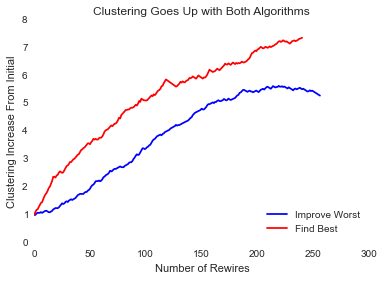

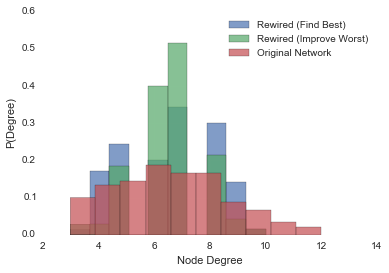

In [6]:
plot(improve_worst_clustering/improve_worst_clustering[0], color='b', label="Improve Worst")
plot(find_best_clustering/find_best_clustering[0], color='r', label="Find Best")
ylabel("Clustering Increase From Initial")
title("Clustering Goes Up with Both Algorithms")
xlabel("Number of Rewires")

legend(loc=4)

figure()
hist(sum(find_best_A,axis=1), alpha=.7, label='Rewired (Find Best)', normed=True)
hist(sum(improve_worst_A,axis=1), alpha=.7, label='Rewired (Improve Worst)', normed=True)
hist(sum(nx.adjacency_matrix(g).todense(),axis=1), alpha=.7, label='Original Network', normed=True)
ylabel("P(Degree)")
xlabel("Node Degree")
legend(loc=1)

In [ ]:
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best,
                                                                             preserve_degrees=True)
find_best_clustering = array(triangles_completed)/array(triangles_possible)

g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
improve_worst_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_improve_worst,
                                                                                 preserve_degrees=True)
improve_worst_clustering = array(triangles_completed)/array(triangles_possible)

plot(improve_worst_clustering/improve_worst_clustering[0], color='b', label="Improve Worst")
plot(find_best_clustering/find_best_clustering[0], color='r', label="Find Best")
ylabel("Clustering Increase From Initial")
title("Clustering Goes Up with Both Algorithms")
xlabel("Number of Rewires")

legend(loc=4)

figure()
hist(sum(find_best_A,axis=1), alpha=.7, label='Rewired (Find Best)', normed=True)
hist(sum(improve_worst_A,axis=1), alpha=.7, label='Rewired (Improve Worst)', normed=True)
hist(sum(nx.adjacency_matrix(g).todense(),axis=1), alpha=.7, label='Original Network', normed=True)
ylabel("P(Degree)")
xlabel("Node Degree")
legend(loc=1)

In [36]:
g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
find_best_A = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best,
                                                                             preserve_degrees=True,
                                                                             property_functions=None)

g = original_graph.copy()
A = nx.adjacency_matrix(g).todense()
improve_worst_A = cluster_rewire_graph(A, rewire_function=cr.one_move_improve_worst,
                                                                                 preserve_degrees=True,
                                                                                 property_functions=None)
figure()
hist(sum(find_best_A,axis=1), alpha=.7, label='Rewired (Find Best)', normed=True)
hist(sum(improve_worst_A,axis=1), alpha=.7, label='Rewired (Improve Worst)', normed=True)
hist(sum(nx.adjacency_matrix(g).todense(),axis=1), alpha=.7, label='Original Network', normed=True)
ylabel("P(Degree)")
xlabel("Node Degree")
legend(loc=1)

Attempting 5231 edge rewires, out of 5231 edges
Rewiring 0 out of 5231
Rewiring 10 out of 5231
Rewiring 20 out of 5231
Rewiring 30 out of 5231
Rewiring 40 out of 5231
Rewiring 50 out of 5231
Rewiring 60 out of 5231
Rewiring 70 out of 5231
Rewiring 80 out of 5231
Rewiring 90 out of 5231
Rewiring 100 out of 5231
Rewiring 110 out of 5231
Rewiring 120 out of 5231
Rewiring 130 out of 5231
Rewiring 140 out of 5231
Rewiring 150 out of 5231
Rewiring 160 out of 5231
Rewiring 170 out of 5231
Rewiring 180 out of 5231
Rewiring 190 out of 5231
Rewiring 200 out of 5231
Rewiring 210 out of 5231
Rewiring 220 out of 5231
Rewiring 230 out of 5231
Rewiring 240 out of 5231
Rewiring 250 out of 5231
Rewiring 260 out of 5231
Rewiring 270 out of 5231
Rewiring 280 out of 5231
Rewiring 290 out of 5231
Rewiring 300 out of 5231
Rewiring 310 out of 5231
Rewiring 320 out of 5231
Rewiring 330 out of 5231
Rewiring 340 out of 5231
Rewiring 350 out of 5231
Rewiring 360 out of 5231
Rewiring 370 out of 5231
Rewiring 380 

KeyboardInterrupt: 

In [25]:
# g = original_graph.copy()
# A = nx.adjacency_matrix(g).todense()
# find_best_A, (triangles_completed, triangles_possible) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best)
# find_best_clustering = array(triangles_completed)/array(triangles_possible)
# g = original_graph.copy()
# A = nx.adjacency_matrix(g).todense()
# find_best_A, (triangles_completed_test, triangles_possible_test) = cluster_rewire_graph(A, rewire_function=cr.one_move_find_best,
#                                                                                         property_functions = [cr.number_of_triangles,cr.number_of_possible_triangles])
# scatter(diff(triangles_completed),diff(triangles_completed_test))
# plot((0,7),(0,7))
# ylabel("True")
# xlabel("My Code")
# scatter(diff(triangles_possible),diff(triangles_possible_test))
# ylabel("True")
# xlabel("My Code")
# plot(triangles_possible,triangles_possible_test)

Attempting 355 edge rewires, out of 355 edges
Rewiring 0 out of 355
Rewiring 10 out of 355
Rewiring 20 out of 355
Rewiring 30 out of 355
Rewiring 40 out of 355
Rewiring 50 out of 355
Rewiring 60 out of 355
Rewiring 70 out of 355
Rewiring 80 out of 355
Rewiring 90 out of 355
Rewiring 100 out of 355
Rewiring 110 out of 355
Rewiring 120 out of 355
Rewiring 130 out of 355
Rewiring 140 out of 355
Rewiring 150 out of 355
Rewiring 160 out of 355
Rewiring 170 out of 355
Rewiring 180 out of 355
Rewiring 190 out of 355
Rewiring 200 out of 355
Rewiring 210 out of 355
Rewiring 220 out of 355
Rewiring 230 out of 355
Rewiring 240 out of 355
Rewiring 250 out of 355
Rewiring 260 out of 355
Couldn't make a move!
Rewired 74.6 percent of edges
